This notebook contains a few methods to visualize the results of the [software developer salary questionnaire](https://github.com/oncekiyazilimci/2022-yazilimci-maaslari) organized by [oncekiyazilimci](https://github.com/oncekiyazilimci).

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

Inspecting the dataframe:

In [2]:
df = pd.read_csv("maas-anketi.csv")
df

,level,position,tech_stack,experience,gender,company,company_size,work_type,city,currency,salary_for_other_currency,salary_for_tl_currency
0,Middle,Back-end Developer,Php,3 - 5 Yıl,Erkek,Startup,25 - 50 Kişi,Hibrit (Ofis + Remote),İstanbul,₺ - Türk Lirası,NaN,15.000 TL - 15.999 TL
1,Junior,Front-end Developer,React,0 - 1 Yıl,Erkek,Startup,10 - 25 Kişi,Hibrit (Ofis + Remote),İstanbul,₺ - Türk Lirası,NaN,8.000 TL - 8.999 TL
2,Middle,Back-end Developer,.Net,1 - 3 Yıl,Erkek,Outsource,10 - 25 Kişi,Remote,İstanbul,₺ - Türk Lirası,NaN,15.000 TL - 15.999 TL
3,Junior,Full Stack Developer,"Java, JavaScript | Html | Css, React, React Na...",1 - 3 Yıl,Erkek,Startup,10 - 25 Kişi,Hibrit (Ofis + Remote),İstanbul,₺ - Türk Lirası,NaN,10.000 TL - 10.999 TL
4,Junior,Back-end Developer,".Net, JavaScript | Html | Css",0 - 1 Yıl,Erkek,Kurumsal,250+,Pandemi Nedeniyle; Geçici Olarak Hibrit (Ofis ...,Kocaeli,₺ - Türk Lirası,NaN,5.000 TL - 5.999 TL
...,...,...,...,...,...,...,...,...,...,...,...,...
5025,Junior,Back-end Developer,.Net,1 - 3 Yıl,Erkek,Outsource,25 - 50 Kişi,Hibrit (Ofis + Remote),İstanbul,₺ - Türk Lirası,NaN,8.000 TL - 8.999 TL
5026,Junior,Mobile Application Developer,Kotlin,0 - 1 Yıl,Erkek,Fintech / Finans,250+,Remote,İstanbul,₺ - Türk Lirası,NaN,10.000 TL - 10.999 TL
5027,Junior,Back-end Developer,Php,0 - 1 Yıl,Kadın,E-Ticaret,50 - 100 Kişi,Hibrit (Ofis + Remote),İstanbul,₺ - Türk Lirası,NaN,8.000 TL - 8.999 TL
5028,Senior,Full Stack Developer,".Net, JavaScript | Html | Css, React Native",3 - 5 Yıl,Erkek,Outsource,250+,Pandemi Nedeniyle; Geçici Olarak Remote,İstanbul,₺ - Türk Lirası,NaN,25.000 TL - 25.999 TL


Selecting the rows with the Turkish Lira:

In [3]:
df = df[df['currency'] == '₺ - Türk Lirası']
df = df.drop(columns=['salary_for_other_currency'])
df['currency'].value_counts()

₺ - Türk Lirası    4493
Name: currency, dtype: int64

Creating a new column using the "salary_for_tl_currency":

In [15]:
salary_select = lambda x, i: int(re.findall("[\d.]+", x)[i].replace(".", ""))
df['salary_lower'] = df['salary_for_tl_currency'].apply(lambda x: salary_select(x, 0))

List of positions available in the questionnaire:

In [34]:
df['position'].value_counts()

Full Stack Developer              1314
Back-end Developer                1151
Front-end Developer                510
Mobile Application Developer       405
Team / Tech Lead                   252
Software Development Manager       136
Software Architect                 111
Embedded Software Developer        108
Data Scientist                      95
DevOps Engineer                     84
QA / Test Automation Developer      83
Game Developer                      75
CTO                                 39
SAP/ABAP/ERP Developer              18
Data Analyst                        15
Machine Learning                    13
Project & Product Manager / PO      13
Data Engineer                       10
Database Administrator               9
Support Engineer                     8
Business Analyst                     8
RPA Developer                        7
IT Specialist                        6
R&D Engineer                         5
SysAdmin                             5
Security                 

Below, you can edit the `POSITION` variable with a position available in the questionnaire and inspect the rows that containt this position:

In [64]:
POSITION = "Data Scientist"

position_df = df[df['position']==POSITION]
position_df


,level,position,tech_stack,experience,gender,company,company_size,work_type,city,currency,salary_for_tl_currency,salary_lower
57,Middle,Data Scientist,Python,3 - 5 Yıl,Erkek,Kurumsal,100 - 250 Kişi,Hibrit (Ofis + Remote),İstanbul,₺ - Türk Lirası,18.000 TL - 18.999 TL,18000
292,Middle,Data Scientist,Python,3 - 5 Yıl,Erkek,Kurumsal,250+,Remote,İstanbul,₺ - Türk Lirası,15.000 TL - 15.999 TL,15000
605,Junior,Data Scientist,Python,0 - 1 Yıl,Erkek,Kurumsal,250+,Ofis,İstanbul,₺ - Türk Lirası,8.000 TL - 8.999 TL,8000
891,Junior,Data Scientist,Python,0 - 1 Yıl,Erkek,Kurumsal,250+,Hibrit (Ofis + Remote),İstanbul,₺ - Türk Lirası,9.000 TL - 9.999 TL,9000
1355,Junior,Data Scientist,Python,1 - 3 Yıl,Erkek,Startup,250+,Remote,İstanbul,₺ - Türk Lirası,13.000 TL - 13.999 TL,13000
...,...,...,...,...,...,...,...,...,...,...,...,...
4819,Middle,Data Scientist,Python,1 - 3 Yıl,Erkek,E-Ticaret,250+,Remote,İstanbul,₺ - Türk Lirası,12.000 TL - 12.999 TL,12000
4901,Middle,Data Scientist,Java,7 - 10 Yıl,Erkek,Kurumsal,1 - 10 Kişi,Ofis,Ankara,₺ - Türk Lirası,49.000 TL - 49.999 TL,49000
4917,Senior,Data Scientist,"Java, Python",10 - 14 Yıl,Erkek,Kurumsal,250+,Pandemi Nedeniyle; Geçici Olarak Remote,İstanbul,₺ - Türk Lirası,34.000 TL - 34.999 TL,34000
5013,Middle,Data Scientist,JavaScript | Html | Css,1 - 3 Yıl,Kadın,Kurumsal,250+,Remote,İstanbul,₺ - Türk Lirası,14.000 TL - 14.999 TL,14000


Using the position dataframe created above, we can plot the distribution of salaries. The `COLOR_BY` variable below can be edited to any column name in the table above to view the distribution grouped by that column. Here, I used the `level` column:

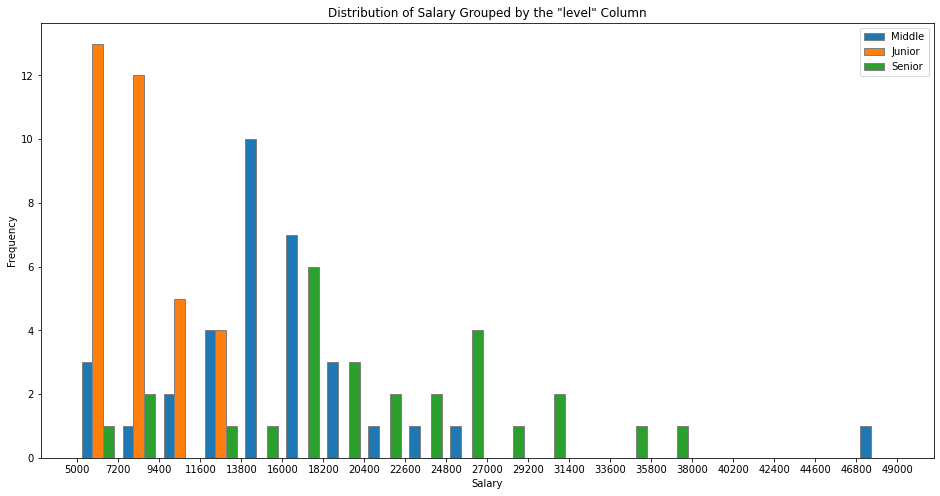

In [104]:
COLOR_BY = 'level'
labels = position_df[COLOR_BY].unique()

fig, ax = plt.subplots(figsize=(16,8))
counts, bins, patches = ax.hist([position_df.loc[position_df[COLOR_BY] == x, 'salary_lower'] for x in labels],
                                 bins= 20,
                                 edgecolor='gray',
                                 label=labels)
ax.set_xticks(bins)
ax.set_title("Distribution of Salary Grouped by the \"%s\" Column" % COLOR_BY)
ax.set_xlabel("Salary")
ax.set_ylabel("Frequency")
plt.legend()
plt.show()

To make the plot above more interpretable, I also plot the same graph with lines: 

Text(0, 0.5, 'Frequency')

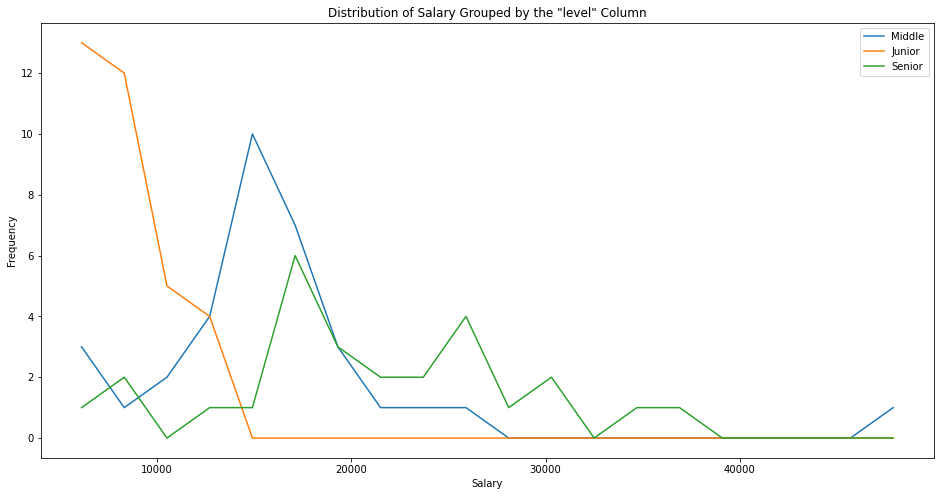

In [107]:
bin_avgs = list(map(lambda x: sum(x)/2, zip(bins, np.roll(bins, -1))))[:-1]
plt.figure(figsize=(16,8))
for count,label in zip(counts, labels):
    plt.plot(bin_avgs, count, label=label)
plt.legend()
plt.title("Distribution of Salary Grouped by the \"%s\" Column" % COLOR_BY)
plt.xlabel("Salary")
plt.ylabel("Frequency")